# **[Week 6] Support Vector Machine and Unsupervised Learning Practice**






# **Topic 1: Support Vector Machine Practice**
## **Objective**
###We will utilize **open source machine learning library of Scikit-Learn**
* Task 1: Training SVM with **linearly separable dataset**
* Task 2: Training SVM with dataset including **outliers**
* (Optional) Task 3: Training **non-linear SVM**

## **Recap: What is SVM?**

####Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

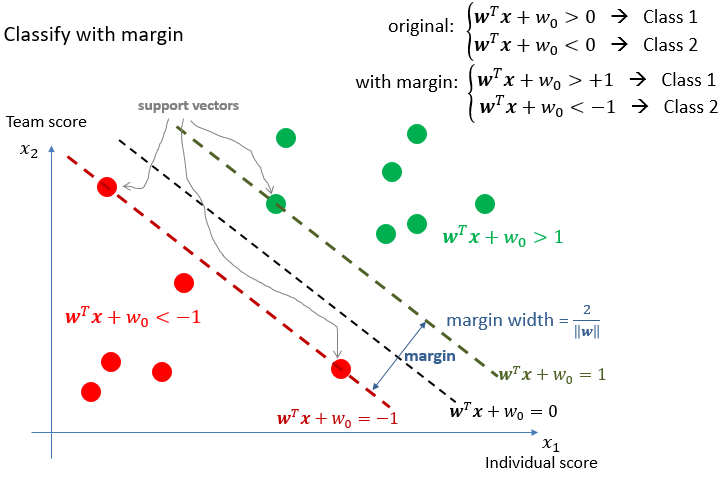

###**Goal:** Find $\mathbf{w}$ that maximizes the margin $\frac{2}{||\mathbf{w}||}$, while correctly separating the training samples 

###$\iff$ Find $\mathbf{w}$ that minimizes $\frac{||\mathbf{w}||^2}{2}$ such that $(\mathbf{w}^T\mathbf{x}_i+w_0)t_i\geq 1$ for all $1\leq i \leq n$ (see lecture note page 29)

---

### However, the above problem have some issues 

###**Issue 1. The solution may lead to overfitting:**

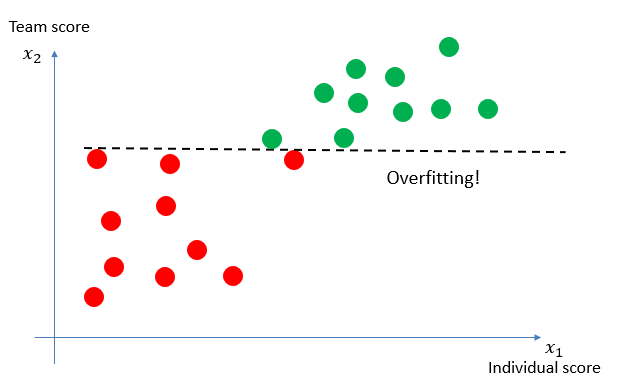

###**Issue 2. The solution may not exist (Data is often not linearly separable):**

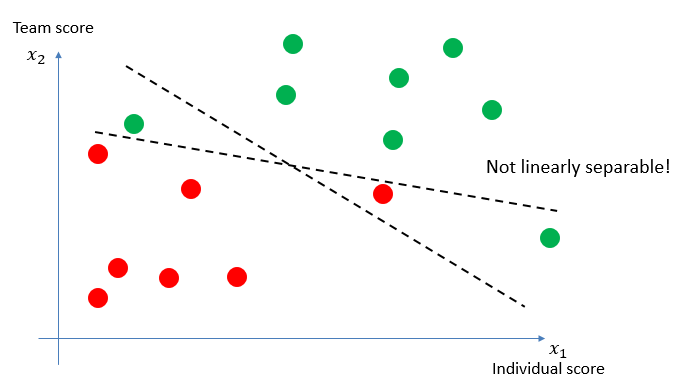

### To handle both issues, we minimize the following loss function:


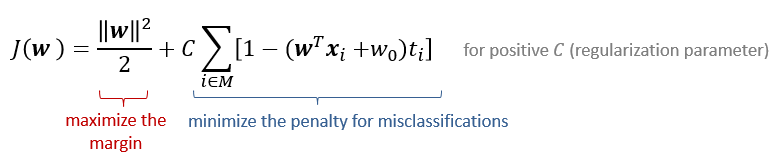

### where $M$ is the misclassified dataset.

### Regularization parameter $C$: Controls the amount of penalty for missclassifcation. A very large $C$ may lead to overfitting, and a very small $C$ may lead to underfitting.

###This problem can be solved via gradient descent (as in pages 40, 41 of the lecture note). **In this practice session, we utilize Scikit-Learn library to train SVM.**

In [ ]:
# Setting
import numpy as np
import sklearn       #### import sklearn 

import matplotlib.pyplot as plt
from sklearn import svm      #### import svm library from sklearn

## **Task 1: The Linearly Separable Case**

###Step 1: Generate samples from normal distributions (exactly the same code with the one in the previous practice session)

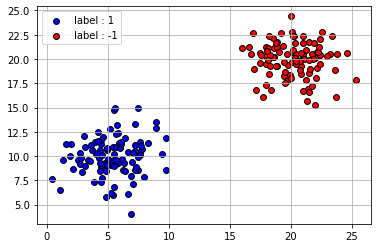

In [ ]:
# generate samples from normal distributions with two dimensional
np.random.seed(10)
n = 100 # size of samples
X1 = np.random.normal(loc=(5, 10), scale=2, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=2, size=(n, 2)) # X1 and X2 have different mean
T1 = np.ones(n)
T2 = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))

X1_test = np.random.normal(loc=(5, 10), scale=2, size=(n, 2)) # loc and scale indicate mean and variance
X2_test = np.random.normal(loc=(20, 20), scale=2, size=(n, 2)) # X1 and X2 have different mean
T1_test = np.ones(n)
T2_test = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_test = np.concatenate((X1_test, X2_test))
T_test = np.concatenate((T1_test, T2_test))

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

plt.show()

###Step 2: Training SVM with Linear Kernel

####The samples above are linearly separable.

####Solve the above problem using a Support Vector Machine classifier with linear kernel.

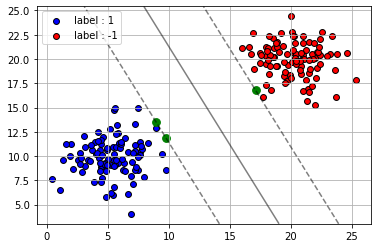

In [ ]:
# Linear Support Vector Classification.

clf = svm.SVC(kernel='linear', C=1) ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel. Regularazation parameter is set to C=1.
clf.fit(X_train, T_train)    ## We train the model on the training data (X_train, T_train), using the fit method.


# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)


plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='g') # highlight support vectors
plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--']) # draw decision boundary and the parallel lines containing the support vectors  


## **Task 2: Handling Outliers by changing Regularization Parameter**


###Step 1: Add two outlier samples to the training dataset

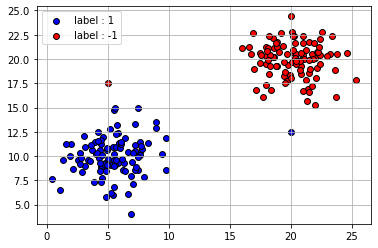

In [ ]:
###### Define two outlier samples
outlier_x1, outlier_x2 = np.array([[20,12.5]]), np.array([[5,17.5]]) 
outlier_t1, outlier_t2 = np.array([1]), np.array([-1])

# concatenate X1, X2 and outliers
X_train = np.concatenate((X1, X2, outlier_x1, outlier_x2))
T_train = np.concatenate((T1, T2, outlier_t1, outlier_t2))
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
plt.show()

###Step 2: Train SVM (with Linear Kernal) with different Regularization parameter $C$



In [ ]:
#Linear Support Vector Classification.

############ Try different C values and check how the decision boundary changes ############  
clf_lowC = svm.SVC(kernel='linear',  C=     )       ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel. Chooose small regularization parameter.
clf_highC = svm.SVC(kernel='linear',  C=     )      ## We use support vector classifer (SVC) in the Scikit-Learn's svm library: We use linear kernel. Chooose large regularization parameter.
############################################################################################

############ Write your code here: Train the above two models with fit method in sklearn ############  


#####################################################################################################



xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z_lowC = clf_lowC.decision_function(xy).reshape(xx.shape)
Z_highC = clf_highC.decision_function(xy).reshape(xx.shape)

plt.figure(figsize=(15,4))
# Visualize

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_lowC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Low C')


plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()
plt.contour(xx, yy, Z_highC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('High C')

plt.show()

## **(Optional) Task 3: Non-Linear SVM**

###Step 1: Generate dataset

array([-4.02776597])

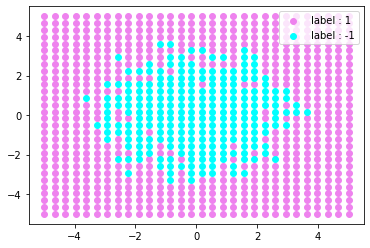

In [ ]:
X1, X2 = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
X1, X2 = X1.reshape(900,1), X2.reshape(900,1)
X_train = np.concatenate((X1,X2),axis=1)
T_train = np.ones(900)
for idx in range(len(X_train)):
    if X1[idx]**2+X2[idx]**2 < 9+np.random.randn(1)*3:
        T_train[idx] = -1
        
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.legend(loc='upper right')

np.random.randn(1)*2

###Step 2: Train SVM with Non-Linear Kernel

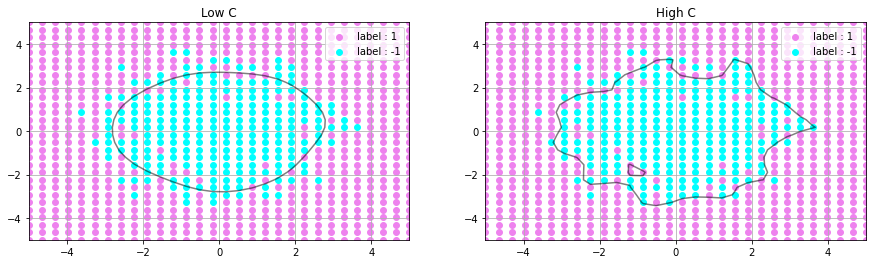

In [ ]:
############ Try different C values and check how the decision boundary changes ############  
clf_lowC = svm.SVC(kernel="rbf", gamma="auto",  C=   0.1  )            ## We use rbf kernel, which is one of non-linear kernel. Chooose small regularization parameter.
clf_highC = svm.SVC(kernel="rbf", gamma="auto",  C=   1000  )           ## We use rbf kernel, which is one of non-linear kernel. Chooose large regularization parameter.
############################################################################################

############ Write your code here: Train the above two models with fit method in sklearn ############  


#####################################################################################################


Z_lowC = clf_lowC.decision_function(X_train).reshape(xx.shape)
Z_highC = clf_highC.decision_function(X_train).reshape(xx.shape)
xx, yy = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))

plt.figure(figsize=(15,4))

plt.subplot(121)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_lowC, colors='k', levels=[0], alpha=0.5)
plt.title('Low C')


plt.subplot(122)
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.grid(True)
plt.legend(loc='upper right')
plt.contour(xx, yy, Z_highC, colors='k', levels=[0], alpha=0.5)
plt.title('High C')

plt.show()

___________________________________________________________________________________________________

# **Topic 2: Unsupervised Learning**

Unsupervised learning is type of learning algorithms that utilize unlabeled data to find commonalities/similarities among the data. Clustering is the most common type of unsupervised learning, so we will exercise this with MNIST data.
 MNIST data is  binary images of handwritten digits, and it has already labeled. Today, we will not use the label to cluster the data.

- In this practice session, we will implement the following 3 clustering method: **K-means Clustering, Agglomerative Clustering, DBSCAN**
- To this end, we will utilize Scikit-Learn package.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data from https://www.openml.org/d/554, it takes about a minute
X, T = fetch_openml('mnist_784', version=1, return_X_y=True)

# Extracting 0~4 digits
for i in range(5):
  temp_arr = X[T=='{}'.format(i)]
  temp_arr_T = T[T=='{}'.format(i)]
  try:
    X_part = np.vstack([X_part, temp_arr])
    T_part = np.concatenate([T_part, temp_arr_T])
  except:
    X_part = temp_arr
    T_part = temp_arr_T

In [ ]:
np.random.seed(1)
X_train, X_test, T_train, T_test = train_test_split(X_part, T_part, train_size=5000, test_size=1000, shuffle=True) # 5000 samples for clustering (we use only X_train)

# Scaling data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# TSNE for visualization, it takes about 2~3 minutes
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300, random_state=1)
TSNE_X = model.fit_transform(X_train_s)

In [ ]:
# Image plotting function
def img_plt(X_train, Y_train, n):
  X_train_2d = X_train.reshape(X_train.shape[0], 28, 28)
  fig, axes = plt.subplots(n, 10, figsize=(7.5,7.5))
  for j in range(n):
    for i in range(10):
        if n==1:
            ax = axes[i]
        else:
            ax = axes[j, i]
        try:        
          ax.imshow(X_train_2d[Y_train==j][i], cmap='gray_r')
          ax.axis('off')
          if i == 0:
            ax.set_title('Cluster: {}'.format(j))
        except:
          ax.axis('off')
  
  plt.tight_layout()
  plt.show()

In [ ]:
# Visualization with TSNE
def vec_vis(x, y, T, n):
  plt.rcParams['figure.figsize'] = [20, 8]
  color_num = n
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  xs = x[:,0]
  ys = x[:,1]
  ax1.set_title("t-SNE Visualization with Clustering")
  scatter = ax1.scatter(xs, ys, c=y, cmap=plt.get_cmap('rainbow', color_num))
  legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
  ax2.set_title("t-SNE Visualization with True label")
  scatter = ax2.scatter(xs, ys, c=list(map(int, T)), cmap=plt.get_cmap('rainbow', 5))
  legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
  plt.show()

## **Step 1-1. K-Means Clustering**

You can use K-means clustring from scikit learn cluster. The only thing you have to do is to choose the number of clusters. Here we only use 0~4 digits, 5 is the best choice for number of clusters.

In [ ]:
n = 5 # number of clusters
model = cluster.KMeans(n_clusters=n, random_state=1) # 'Kmeans' from 'sklearn.cluster', 'n_cluster' default=2
Y_train = model.fit_predict(X_train_s) # their clustering result using 'X_train_s' will be assigned to 'Y_train'

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X, Y_train, T_train, n) # visualize

## **Step 1-2. Agglomerative Clustering**

For agglomerative clustering, there are 4 linking criteria used in Sckikit-learn. : {"ward", "average", "complete", "single"} ("single" is newly added)

If you do not input the linking criterion, the default one is "ward". You can try other linking criteria.

In [ ]:
n = 5 # number of clusters
model = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward') # 'Agglomerative Clustering' from 'sklearn.cluster'
Y_train = model.fit_predict(X_train_s) # their clustering result using 'X_train_s' will be assigned to 'Y_train'

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X, Y_train, T_train, n) # visualize

## **Step 1-3. DBSCAN (Density-based spatial clustering of applications with noise)** 
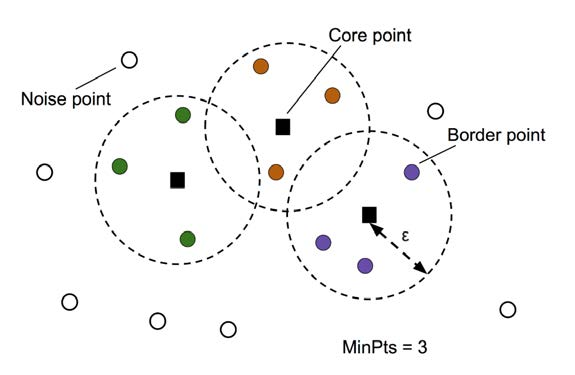


In DBSCAN algorithm, we do not input the number of clusters. Instead, we use $ε$ and MinPts. It means that choosing appropiate value of those is really critical for DBSCAN. Let's try if you have some time.



In [ ]:
model = cluster.DBSCAN(eps=8, min_samples=10) 
Y_train = model.fit_predict(X_train_s)


labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # number of clusters
n_noise_ = list(labels).count(-1) # number of noise points, '-1' means noise
n = n_clusters_

print("Number of clusters: ", n_clusters_)
print("Number of noise points: ", n_noise_)

img_plt(X_train, Y_train, n)
vec_vis(TSNE_X, Y_train, T_train, n+1)

## **Step 1-4. Cluster synthetic data**

- As you see, MNIST data which is not well-clustered with density based clustering algorithms. So, we will try again with synthetic data and compare DBSCAN with other clustering algorithms. 
- After running the code and checking the results, answer the following questions:

## **Q: Think about why DBSCAN didn't work well in the above dataset (MNIST), but it can work well on this dataset (synthetic) compared to the other two algorithms (K-means and Agglomerative clustering)**

In [ ]:
from sklearn import datasets

np.random.seed(1)
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)

X_train2, T_train2 = noisy_moons

# Scaling data
scaler2 = StandardScaler()
X_train_s2 = scaler2.fit_transform(X_train2)

model2 = cluster.DBSCAN(eps=0.3, min_samples=10) 
Y_train2_d = model2.fit_predict(X_train_s2)

model2 = cluster.KMeans(n_clusters=2, random_state=1) 
Y_train2_k = model2.fit_predict(X_train_s2)

model2 = cluster.AgglomerativeClustering(n_clusters=2) 
Y_train2_a = model2.fit_predict(X_train_s2)

plt.rcParams['figure.figsize'] = [30, 8]
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

xs = X_train2[:,0]
ys = X_train2[:,1]
ax1.set_title("DBSCAN")
scatter = ax1.scatter(xs, ys, c=Y_train2_d, cmap=plt.get_cmap('rainbow', 5))
legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
ax2.set_title("K-means Clustering")
scatter = ax2.scatter(xs, ys, c=Y_train2_k, cmap=plt.get_cmap('rainbow', 5))
legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
ax3.set_title("Agglomerative Clustering")
scatter = ax3.scatter(xs, ys, c=Y_train2_a, cmap=plt.get_cmap('rainbow', 5))
legend = ax3.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
plt.show()

### **Reference**

- SVM https://scikit-learn.org/stable/modules/svm.html  
LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC  
- SVM: Maximum margin separating hyperplane https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py  
- Non-linear SVM https://sdsawtelle.github.io/blog/output/week7-andrew-ng-machine-learning-with-python.html  
SVM on Iris data  https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

- MNIST Clustering : https://github.com/yoonkt200/recommender-system/blob/master/deprecated/clustering/mnist-example.ipynb

- K-means Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=k%20means#sklearn.cluster.KMeans

- Agglomerative Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative#sklearn.cluster.AgglomerativeClustering

- DBSCAN : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

- Figure : Raschkaand and Mirjalili